In [1]:
import netCDF4 as nc

def print_all_variables(file_path):
    # Open the NetCDF file using netCDF4
    try:
        dataset = nc.Dataset(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return
    except Exception as e:
        print(f"Error while opening the NetCDF file: {e}")
        return

    # Print all variables in the dataset
    print("Variables in the NetCDF file:")
    for variable_name in dataset.variables:
        print(variable_name)

    # Close the NetCDF dataset
    dataset.close()

if __name__ == "__main__":
    file_path = "/space/junzheyin/result/pysteps_mpi_24hours_deterministic/201508131920-knmi/201508131920_nowcast.netcdf"
    print_all_variables(file_path)


Variables in the NetCDF file:
xc
yc
lon
lat
polar_stereographic
ens_number
time
precip_accum


In [2]:
# Importing the required library
from netCDF4 import Dataset

# Define the path to your NetCDF file
file_path = "/space/junzheyin/result/pysteps_mpi_24hours_deterministic/201508131920-knmi/201508131920_nowcast.netcdf"  # Replace with your file path

# Open the NetCDF file
data = Dataset(file_path, "r")

# Initialize an empty dictionary to store the dimensions
dimensions = {}

# Loop over all variables and store their dimensions
for variable_name in data.variables:
    dimensions[variable_name] = data.variables[variable_name].shape

# Print the dimensions of all variables
print(dimensions)


{'xc': (700,), 'yc': (765,), 'lon': (765, 700), 'lat': (765, 700), 'polar_stereographic': (), 'ens_number': (1,), 'time': (72,), 'precip_accum': (1, 72, 765, 700)}


In [2]:
# Importing the required library
from netCDF4 import Dataset

# Define the path to your NetCDF file
file_path = "/users/junzheyin/201101120405_nowcast.netcdf"  # Replace with your file path

# Open the NetCDF file
data = Dataset(file_path, "r")

# Initialize an empty dictionary to store the dimensions
dimensions = {}

# Loop over all variables and store their dimensions
for variable_name in data.variables:
    dimensions[variable_name] = data.variables[variable_name].shape

# Print the dimensions of all variables
print(dimensions)

{'xc': (27,), 'yc': (27,), 'lon': (27, 27), 'lat': (27, 27), 'polar_stereographic': (), 'ens_number': (20,), 'time': (72,), 'precip_accum': (20, 72, 27, 27)}


Pysteps configuration file found at: /users/junzheyin/Large_Sample_Nowcasting_Evaluation/pysteps/pysteps/pystepsrc

(1, 72, 256, 256)


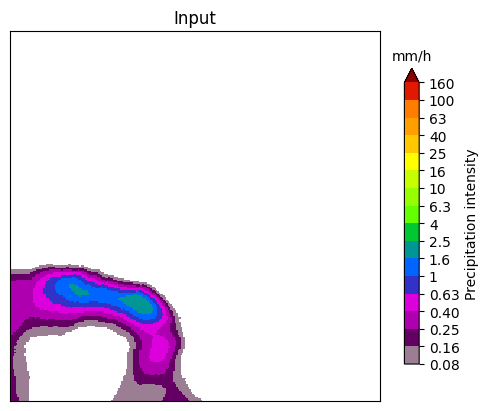

In [1]:
import os
os.chdir('/users/junzheyin/Large_Sample_Nowcasting_Evaluation/pysteps')
import numpy as np
import matplotlib.pyplot as plt
import time
from pysteps.verification.detcatscores import det_cat_fct    
from pysteps.verification.detcontscores import det_cont_fct
from pysteps.visualization import plot_precip_field
from netCDF4 import Dataset

# Load the data
file = "/users/junzheyin/Result/pysteps_mpi_24hours_deterministic/201508131920-knmi/201508131920_nowcast.netcdf"
data = Dataset(file, "r")
rainfall_data = np.array(data.variables['precip_accum'][:])
rainfall_data = rainfall_data[:,:,264:520,242:498]
rainfall_data = rainfall_data.astype('float32') 
rainfall_data[rainfall_data == 65535] = 0
rainfall_data = rainfall_data/100*12
rainfall_data = np.clip(rainfall_data, 0, 128)
print(rainfall_data.shape)
# Set up the geographical boundaries of your image
# These values depend on your data

for t in range(1):
# Create a new figure
    a_display = rainfall_data[0,5,:,:]
    
    plot_precip_field(a_display, title="Input")

# Show the plot
    plt.show()


(1, 72, 765, 700)


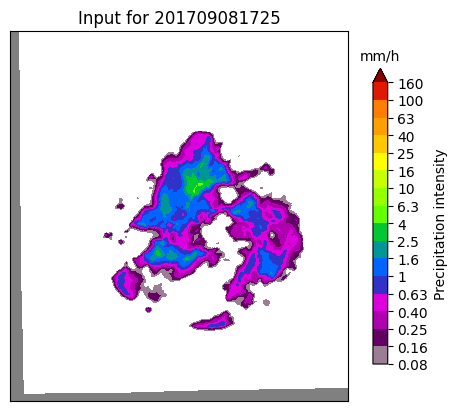

(1, 72, 765, 700)


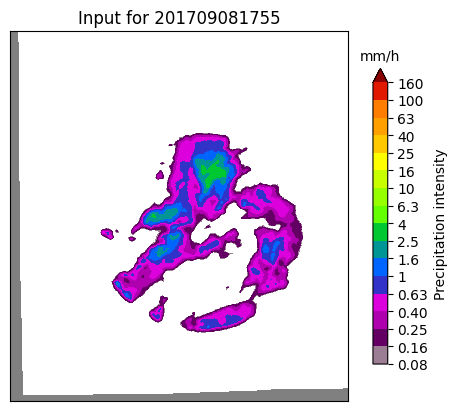

(1, 72, 765, 700)


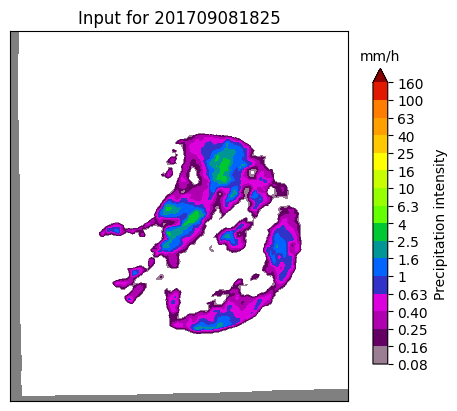

(1, 72, 765, 700)


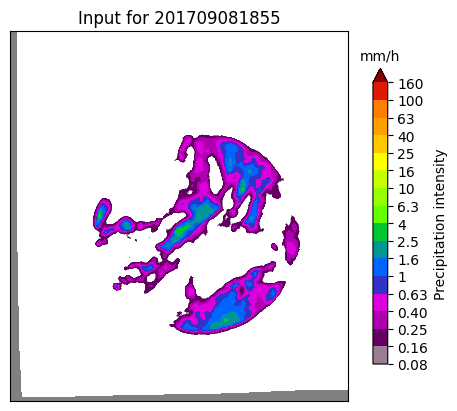

In [18]:
import os
import datetime

os.chdir('/users/junzheyin/Large_Sample_Nowcasting_Evaluation/pysteps')
import numpy as np
import matplotlib.pyplot as plt
from pysteps.verification.detcatscores import det_cat_fct    
from pysteps.verification.detcontscores import det_cont_fct
from pysteps.visualization import plot_precip_field
from netCDF4 import Dataset

# Starting time
start_time = datetime.datetime.strptime("201709081725", "%Y%m%d%H%M")

# Number of iterations (2 hours / 30 minutes = 4 iterations)
num_iterations = 4

# Loop over the desired time range
for i in range(num_iterations):
    # Convert the current time to the desired filename format
    current_time_str = start_time.strftime("%Y%m%d%H%M")
    
    # Construct the filename
    file = f"/space/junzheyin/result/pysteps_mpi_24hours_deterministic/201709081725-knmi/{current_time_str}_nowcast.netcdf"
    
    # Load the data
    data = Dataset(file, "r")
    rainfall_data = np.array(data.variables['precip_accum'][:])
    #rainfall_data = rainfall_data[:,:,264:520,242:498]
    #rainfall_data = rainfall_data.astype('float32') 
    #rainfall_data[rainfall_data == 65535] = 0
    #rainfall_data = rainfall_data/100*12
    #rainfall_data = np.clip(rainfall_data, 0, 128)
    print(rainfall_data.shape)
    
    # Display the data (as provided in your example)
    a_display = rainfall_data[0,5,:,:]
    plot_precip_field(a_display, title=f"Input for {current_time_str}")
    plt.show()
    
    # Move to the next time step (30 minutes later)
    start_time += datetime.timedelta(minutes=30)


In [4]:
import numpy as np

# Specify the path to the file you want to load
file_path = "/bulk/junzheyin/predictions_new_evl100_fa3_1/201508131920.npy"

# Load the array
array = np.load(file_path)

# Now you can use the array
print(array.shape)


(1, 256, 256)


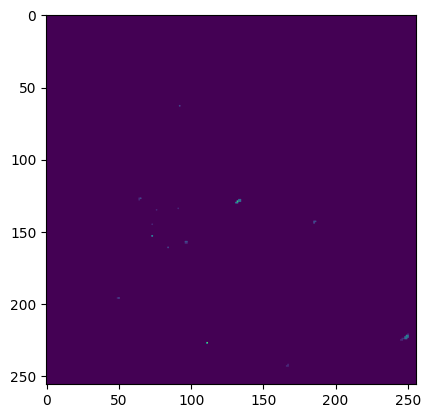

In [24]:
import h5py
import matplotlib.pyplot as plt

# Load the data
image = np.array(h5py.File("/home/hbi/RAD_NL25_RAP_5min/2015/08/RAD_NL25_RAP_5min_201508130920.h5")['image1']['image_data'])
image = image[264:520,242:498]
# Plot the data
plt.imshow(image)  # use appropriate colormap
plt.show()

In [21]:
import h5py

def print_shapes(h5file, path=''):
    for key in h5file.keys():
        new_path = f'{path}/{key}' if path else key
        if isinstance(h5file[key], h5py.Group):
            print(f'Group: {new_path}')
            print_shapes(h5file[key], new_path)
        else:
            print(f'Dataset: {new_path}, Shape: {h5file[key].shape}')

with h5py.File('/home/hbi/RAD_NL25_RAP_5min/2015/08/RAD_NL25_RAP_5min_201508130920.h5', 'r') as f:
    print_shapes(f)


Group: geographic
Group: geographic/map_projection
Group: image1
Group: image1/calibration
Dataset: image1/image_data, Shape: (765, 700)
Group: image1/statistics
Group: overview
Group: radar1
Group: radar2


In [22]:
import h5py

# Open the file in read mode
with h5py.File('/home/hbi/RAD_NL25_RAP_5min/2015/08/RAD_NL25_RAP_5min_201508130920.h5', 'r') as f:
    # Print the keys corresponding to the groups
    print("Groups in the HDF5 file:", list(f.keys()))


Groups in the HDF5 file: ['geographic', 'image1', 'overview', 'radar1', 'radar2']


In [47]:


new_valid = ['201606222325', '201508131920', '201606230050', '201606230100', '201606230200', '201508261735', '201508261800', '201708300255', '201708300300', '201707291755', '201707291800', '201606201210', '201708300155', '201606230300', '201707120520', '201707120600', '201707120455', '201708300055', '201707120700', '201605301745', '201509041820', '201605301800', '201709081725', '201606201300', '201708300420', '201709081650', '201509041755', '201709081545', '201709081455', '201709141200', '201709141155', '201709081800', '201508132000', '201707062000', '201707061955', '201711270745', '201709141300', '201709141055', '201605301655', '201709081900', '201708300500', '201805291515', '202006171920', '201805291455', '201809050545', '202006171855', '201809050600', '201906150240', '201906150300', '202008161555', '202008161600', '201805291600', '202006122025', '201906150155', '201906120820', '201906052100', '202006171755', '201906120755', '201808242240', '201804292310', '201906120940', '202007252055', '201804292255', '201808242300', '202007252100', '201906121000', '202006172000', '201809050700', '202002091830', '202009232020', '201808101930', '201808242050', '201906150400', '201808242100', '202002091900', '202006050545', '201910210430', '202007251955', '201808102000', '201804102045', '201804300000', '201804102100', '201906052200', '201808101820', '202006050600', '201810300150', '201906052300', '201810300200', '201804102200', '201808101755', '201910061250', '201810300300', '202009232100']
new_valid.sort()
dataset = new_valid
print(dataset)

['201508131920', '201508132000', '201508261735', '201508261800', '201509041755', '201509041820', '201605301655', '201605301745', '201605301800', '201606201210', '201606201300', '201606222325', '201606230050', '201606230100', '201606230200', '201606230300', '201707061955', '201707062000', '201707120455', '201707120520', '201707120600', '201707120700', '201707291755', '201707291800', '201708300055', '201708300155', '201708300255', '201708300300', '201708300420', '201708300500', '201709081455', '201709081545', '201709081650', '201709081725', '201709081800', '201709081900', '201709141055', '201709141155', '201709141200', '201709141300', '201711270745', '201804102045', '201804102100', '201804102200', '201804292255', '201804292310', '201804300000', '201805291455', '201805291515', '201805291600', '201808101755', '201808101820', '201808101930', '201808102000', '201808242050', '201808242100', '201808242240', '201808242300', '201809050545', '201809050600', '201809050700', '201810300150', '201810

In [48]:
from datetime import datetime, timedelta

new_valid = ['201508131920', '201508132000', '201508261735', '201508261800', '201509041755', '201509041820', '201605301655', '201605301745', '201605301800', '201606201210', '201606201300', '201606222325', '201606230050', '201606230100', '201606230200', '201606230300', '201707061955', '201707062000', '201707120455', '201707120520', '201707120600', '201707120700', '201707291755', '201707291800', '201708300055', '201708300155', '201708300255', '201708300300', '201708300420', '201708300500', '201709081455', '201709081545', '201709081650', '201709081725', '201709081800', '201709081900', '201709141055', '201709141155', '201709141200', '201709141300', '201711270745', '201804102045', '201804102100', '201804102200', '201804292255', '201804292310', '201804300000', '201805291455', '201805291515', '201805291600', '201808101755', '201808101820', '201808101930', '201808102000', '201808242050', '201808242100', '201808242240', '201808242300', '201809050545', '201809050600', '201809050700', '201810300150', '201810300200', '201810300300', '201906052100', '201906052200', '201906052300', '201906120755', '201906120820', '201906120940', '201906121000', '201906150155', '201906150240', '201906150300', '201906150400', '201910061250', '201910210430', '202002091830', '202002091900', '202006050545', '202006050600', '202006122025', '202006171755', '202006171855', '202006171920', '202006172000', '202007251955', '202007252055', '202007252100', '202008161555', '202008161600', '202009232020', '202009232100']

formatted_dates = []

for date in new_valid:
    date1 = datetime.strptime(date, "%Y%m%d%H%M")
    date2 = date1 + timedelta(minutes=180)
    formatted_dates.append((date1.strftime("%Y%m%d%H%M"), date2.strftime("%Y%m%d%H%M"), 5, "knmi"))

print(formatted_dates)



[('201508131920', '201508132220', 5, 'knmi'), ('201508132000', '201508132300', 5, 'knmi'), ('201508261735', '201508262035', 5, 'knmi'), ('201508261800', '201508262100', 5, 'knmi'), ('201509041755', '201509042055', 5, 'knmi'), ('201509041820', '201509042120', 5, 'knmi'), ('201605301655', '201605301955', 5, 'knmi'), ('201605301745', '201605302045', 5, 'knmi'), ('201605301800', '201605302100', 5, 'knmi'), ('201606201210', '201606201510', 5, 'knmi'), ('201606201300', '201606201600', 5, 'knmi'), ('201606222325', '201606230225', 5, 'knmi'), ('201606230050', '201606230350', 5, 'knmi'), ('201606230100', '201606230400', 5, 'knmi'), ('201606230200', '201606230500', 5, 'knmi'), ('201606230300', '201606230600', 5, 'knmi'), ('201707061955', '201707062255', 5, 'knmi'), ('201707062000', '201707062300', 5, 'knmi'), ('201707120455', '201707120755', 5, 'knmi'), ('201707120520', '201707120820', 5, 'knmi'), ('201707120600', '201707120900', 5, 'knmi'), ('201707120700', '201707121000', 5, 'knmi'), ('2017072